# Análisis de Innovaciones

Las innovaciones constituyen una parte fundamental de toda organización como elemento estratégico. De ser exitosas, serán el futuro de la compañía y pueden situar a la marca en nuevos sectores. Pero la mala planeación en y/o ejecución puede ser una fuga importante de capital y puede ser un elemento que respresente gastos en vez de inversión. Es por ello que saber en donde estamos parados y ofrecer el mayor entendimiento posible de qué podemos hacer mejor o cómo, es indispensable en la actualidad, pues hoy contamos con mayor información disponible. El no hacerlo es una opotunidad no explotada que será una ventaja para los primeros que se aventuren a ello.

Propósito: hacer una evalucación inicial para poder describir la situación al momento de las innovaciones. Al igual inentar brindar modelos con los cuales podamos "predecir" el éxito o fracaso de manera anticipada.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/jorgecajiga/Documents/Proyecto Final BEDU/DA1.csv')

In [3]:
#Exploración general de la tabla que cargué

In [4]:
df.head()

,Admin Status,Innovation Type,Business,Launch Year Y1,NNS (in 000s) Y1,NNS (in 000s) Y2,NNS (in 000s) Y3,NNS (in 000s) Y4,Consolidated Marginal Contribution % Y1,Consolidated Marginal Contribution % Y2,Consolidated Marginal Contribution % Y3,Consolidated Marginal Contribution % Y4,PFME % Y1,PFME % Y2,PFME % Y3,PFME % Y4,Planned Launch Date,Actual Launch Date,Project Closure Date
0,Canceled,Innovation,A,2018,0.28,0.0,0.00,0.00,20.53,0.0,0.0,0.0,3.94,0.00,0.00,0.00,1/8/2018,1/8/2018,11/22/2018
1,Canceled,Innovation,A,2018,0.01,0.0,0.00,0.00,35.78,0.0,0.0,0.0,1.20,0.00,0.00,0.00,2/22/2018,NaN,5/15/2018
2,Canceled,Innovation,D,2018,2.29,0.0,0.00,0.00,58.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8/15/2018,NaN,10/17/2018
3,Canceled,Innovation,G,2018,0.63,0.9,0.94,0.99,55.70,56.0,56.2,56.4,3.51,2.73,3.03,2.89,9/3/2018,NaN,8/16/2018
4,Canceled,Innovation,G,2019,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,7/1/2019,NaN,12/12/2018


In [5]:
print(df.columns)

Index(['Admin Status', 'Innovation Type', 'Business', 'Launch Year Y1',
       'NNS (in 000s) Y1', 'NNS (in 000s) Y2', 'NNS (in 000s) Y3',
       'NNS (in 000s) Y4', 'Consolidated Marginal Contribution % Y1',
       'Consolidated Marginal Contribution % Y2',
       'Consolidated Marginal Contribution % Y3',
       'Consolidated Marginal Contribution % Y4', 'PFME % Y1', 'PFME % Y2',
       'PFME % Y3', 'PFME % Y4', 'Planned Launch Date', 'Actual Launch Date',
       'Project Closure Date'],
      dtype='object')


In [6]:
#Cambiar el nombre de las columnas por los formatos

In [7]:
ncn = {
    'Admin Status':'estatus',
    'Innovation Type':'tipo',
    'Business':'negocio',
    'Launch Year Y1':'a_lanzamiento',
    'NNS (in 000s) Y1':'venta_a1',
    'NNS (in 000s) Y2':'venta_a2',
    'NNS (in 000s) Y3':'venta_a3',
    'NNS (in 000s) Y4':'venta_a4',
    'Consolidated Marginal Contribution % Y1':'mc_a1',
    'Consolidated Marginal Contribution % Y2':'mc_a2',
    'Consolidated Marginal Contribution % Y3':'mc_a3',
    'Consolidated Marginal Contribution % Y4':'mc_a4',
    'PFME % Y1':'me_a1',
    'PFME % Y2':'me_a2',
    'PFME % Y3':'me_a3',
    'PFME % Y4':'me_a4',
    'Planned Launch Date':'lanzamiento_plan',
    'Actual Launch Date':'lanzamiento_actual',
    'Project Closure Date':'cierre_fecha'
}

In [8]:
df1 = df.rename(columns=ncn)
df1.head()

,estatus,tipo,negocio,a_lanzamiento,venta_a1,venta_a2,venta_a3,venta_a4,mc_a1,mc_a2,mc_a3,mc_a4,me_a1,me_a2,me_a3,me_a4,lanzamiento_plan,lanzamiento_actual,cierre_fecha
0,Canceled,Innovation,A,2018,0.28,0.0,0.00,0.00,20.53,0.0,0.0,0.0,3.94,0.00,0.00,0.00,1/8/2018,1/8/2018,11/22/2018
1,Canceled,Innovation,A,2018,0.01,0.0,0.00,0.00,35.78,0.0,0.0,0.0,1.20,0.00,0.00,0.00,2/22/2018,NaN,5/15/2018
2,Canceled,Innovation,D,2018,2.29,0.0,0.00,0.00,58.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8/15/2018,NaN,10/17/2018
3,Canceled,Innovation,G,2018,0.63,0.9,0.94,0.99,55.70,56.0,56.2,56.4,3.51,2.73,3.03,2.89,9/3/2018,NaN,8/16/2018
4,Canceled,Innovation,G,2019,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,7/1/2019,NaN,12/12/2018


In [9]:
df1.dtypes

estatus                object
tipo                   object
negocio                object
a_lanzamiento           int64
venta_a1              float64
venta_a2              float64
venta_a3              float64
venta_a4              float64
mc_a1                 float64
mc_a2                 float64
mc_a3                 float64
mc_a4                 float64
me_a1                 float64
me_a2                 float64
me_a3                 float64
me_a4                 float64
lanzamiento_plan       object
lanzamiento_actual     object
cierre_fecha           object
dtype: object

In [10]:
#Quitar columna 'tipo', todo el concepto es igual

In [11]:
df2=df1.drop(columns='tipo')
df2

,estatus,negocio,a_lanzamiento,venta_a1,venta_a2,venta_a3,venta_a4,mc_a1,mc_a2,mc_a3,mc_a4,me_a1,me_a2,me_a3,me_a4,lanzamiento_plan,lanzamiento_actual,cierre_fecha
0,Canceled,A,2018,0.28,0.0,0.00,0.00,20.53,0.0,0.0,0.0,3.94,0.00,0.00,0.00,1/8/2018,1/8/2018,11/22/2018
1,Canceled,A,2018,0.01,0.0,0.00,0.00,35.78,0.0,0.0,0.0,1.20,0.00,0.00,0.00,2/22/2018,NaN,5/15/2018
2,Canceled,D,2018,2.29,0.0,0.00,0.00,58.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8/15/2018,NaN,10/17/2018
3,Canceled,G,2018,0.63,0.9,0.94,0.99,55.70,56.0,56.2,56.4,3.51,2.73,3.03,2.89,9/3/2018,NaN,8/16/2018
4,Canceled,G,2019,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,7/1/2019,NaN,12/12/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Canceled,B,2018,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,10/31/2018,NaN,8/13/2018
455,Canceled,A,2019,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8/30/2019,NaN,10/1/2018
456,Canceled,B,2019,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,5/3/2019,NaN,10/28/2018
457,Canceled,B,2018,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,10/8/2018,NaN,10/31/2018


In [12]:
df2.count()

estatus               459
negocio               459
a_lanzamiento         459
venta_a1              459
venta_a2              459
venta_a3              459
venta_a4              459
mc_a1                 459
mc_a2                 459
mc_a3                 459
mc_a4                 459
me_a1                 459
me_a2                 459
me_a3                 459
me_a4                 459
lanzamiento_plan      456
lanzamiento_actual     54
cierre_fecha          459
dtype: int64

In [13]:
df2['estatus'].unique()

array(['Canceled', 'Active'], dtype=object)

In [14]:
df2['estatus'].nunique()

2

In [15]:
df2['estatus'].value_counts()

Canceled    307
Active      152
Name: estatus, dtype: int64

In [16]:
df2['a_lanzamiento'].unique()

array([2018, 2019, 2017, 2020, 2021, 2022, 2015, 2012, 2013, 2011, 2014,
       2016,    0, 2023])

In [17]:
lan_entre_18y21 = (df2['a_lanzamiento'] > 2017) & (df2['a_lanzamiento'] < 2022)
df3 = df2[lan_entre_18y21]
df3.head()

,estatus,negocio,a_lanzamiento,venta_a1,venta_a2,venta_a3,venta_a4,mc_a1,mc_a2,mc_a3,mc_a4,me_a1,me_a2,me_a3,me_a4,lanzamiento_plan,lanzamiento_actual,cierre_fecha
0,Canceled,A,2018,0.28,0.0,0.00,0.00,20.53,0.0,0.0,0.0,3.94,0.00,0.00,0.00,1/8/2018,1/8/2018,11/22/2018
1,Canceled,A,2018,0.01,0.0,0.00,0.00,35.78,0.0,0.0,0.0,1.20,0.00,0.00,0.00,2/22/2018,NaN,5/15/2018
2,Canceled,D,2018,2.29,0.0,0.00,0.00,58.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8/15/2018,NaN,10/17/2018
3,Canceled,G,2018,0.63,0.9,0.94,0.99,55.70,56.0,56.2,56.4,3.51,2.73,3.03,2.89,9/3/2018,NaN,8/16/2018
4,Canceled,G,2019,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,7/1/2019,NaN,12/12/2018


In [18]:
df3['a_lanzamiento'].unique()

array([2018, 2019, 2020, 2021])

In [121]:
df3['a_lanzamiento'].count()

302

In [20]:
group_general = df3.groupby('estatus')['estatus'].count()
group_general

estatus
Active      131
Canceled    171
Name: estatus, dtype: int64

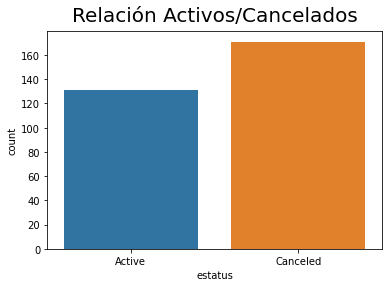

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=group_general.index, y=group_general, ax=ax);

ax.set_ylabel('count')
ax.set_title('Relación Activos/Cancelados', fontsize=20, pad=10);

In [22]:
df_grouped = df3.groupby(['negocio','estatus'])['estatus'].count()
print(df_grouped)

negocio  estatus 
A        Active      22
         Canceled    34
B        Active      22
         Canceled    44
C        Active      34
         Canceled    19
D        Active      16
         Canceled    24
F        Active      18
         Canceled     7
G        Active       7
         Canceled    21
H        Active       9
         Canceled     6
I        Active       3
         Canceled    16
Name: estatus, dtype: int64


In [23]:
df_grouped = df_grouped.unstack(1)
df_grouped

estatus,Active,Canceled
negocio,,
A,22,34
B,22,44
C,34,19
D,16,24
F,18,7
G,7,21
H,9,6
I,3,16


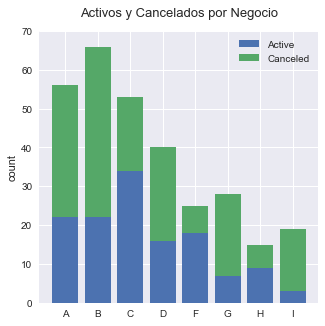

In [24]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(df_grouped.index, df_grouped['Active'], label='Active')
plt2 = ax.bar(df_grouped.index, df_grouped['Canceled'], bottom=df_grouped['Active'])

ax.set_ylabel('count')
ax.set_title('Activos y Cancelados por Negocio', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Active', 'Canceled'));
ax.set_ylim(0, 70);

In [25]:
lan_21 = df2['a_lanzamiento'] == 2021
df4 = df2[lan_21]
df4

,estatus,negocio,a_lanzamiento,venta_a1,venta_a2,venta_a3,venta_a4,mc_a1,mc_a2,mc_a3,mc_a4,me_a1,me_a2,me_a3,me_a4,lanzamiento_plan,lanzamiento_actual,cierre_fecha
21,Active,D,2021,1.51,1.66,1.83,2.01,50.00,50.00,50.00,50.00,1.50,1.50,1.50,1.50,3/2/2021,3/2/2021,9/9/2021
35,Canceled,G,2021,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3/31/2021,NaN,1/23/2019
43,Active,A,2021,0.41,1.06,1.33,1.46,41.00,41.00,41.00,41.00,20.00,15.00,10.00,5.00,10/6/2021,NaN,6/1/2022
46,Active,C,2021,0.46,0.00,0.00,0.00,62.70,0.00,0.00,0.00,2.70,0.00,0.00,0.00,2/11/2021,2/11/2021,6/10/2021
51,Active,B,2021,0.59,0.00,0.00,0.00,33.36,0.00,0.00,0.00,13.70,0.00,0.00,0.00,3/12/2021,NaN,9/2/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,Active,B,2021,4.41,6.17,7.84,9.57,40.80,45.10,46.00,48.20,56.70,33.00,20.80,17.00,6/7/2021,6/7/2021,12/6/2021
432,Active,B,2021,3.40,10.82,11.14,11.42,56.50,56.50,56.50,56.50,9.00,9.00,9.00,9.00,10/15/2021,NaN,3/1/2022
437,Active,G,2021,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,12/1/2021,NaN,5/30/2022
439,Active,F,2021,0.17,0.00,0.00,0.00,65.00,0.00,0.00,0.00,30.33,0.00,0.00,0.00,9/20/2021,NaN,9/20/2021


In [26]:
df4['a_lanzamiento'].unique()

array([2021])

In [27]:
df4.count()

estatus               104
negocio               104
a_lanzamiento         104
venta_a1              104
venta_a2              104
venta_a3              104
venta_a4              104
mc_a1                 104
mc_a2                 104
mc_a3                 104
mc_a4                 104
me_a1                 104
me_a2                 104
me_a3                 104
me_a4                 104
lanzamiento_plan      104
lanzamiento_actual     18
cierre_fecha          104
dtype: int64

In [28]:
group_general21 = df4.groupby('estatus')['estatus'].count()
group_general21

estatus
Active      90
Canceled    14
Name: estatus, dtype: int64

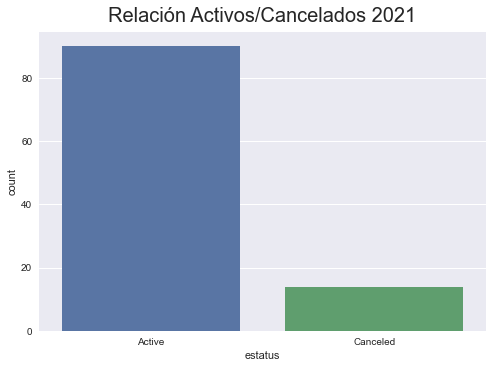

In [29]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=group_general21.index, y=group_general21, ax=ax);

ax.set_ylabel('count')
ax.set_title('Relación Activos/Cancelados 2021', fontsize=20, pad=10);

In [36]:
df_grouped21 = df4.groupby(['negocio','estatus'])['estatus'].count()
print(df_grouped21)

negocio  estatus 
A        Active      12
B        Active      10
         Canceled     1
C        Active      29
         Canceled     5
D        Active      13
         Canceled     2
F        Active      11
         Canceled     1
G        Active       7
         Canceled     3
H        Active       6
I        Active       2
         Canceled     2
Name: estatus, dtype: int64


In [37]:
df_grouped21 = df_grouped21.unstack(1)
df_grouped21

estatus,Active,Canceled
negocio,,
A,12.0,NaN
B,10.0,1.0
C,29.0,5.0
D,13.0,2.0
F,11.0,1.0
G,7.0,3.0
H,6.0,NaN
I,2.0,2.0


In [38]:
df_grouped21 = df_grouped21.fillna(0)
df_grouped21

estatus,Active,Canceled
negocio,,
A,12.0,0.0
B,10.0,1.0
C,29.0,5.0
D,13.0,2.0
F,11.0,1.0
G,7.0,3.0
H,6.0,0.0
I,2.0,2.0


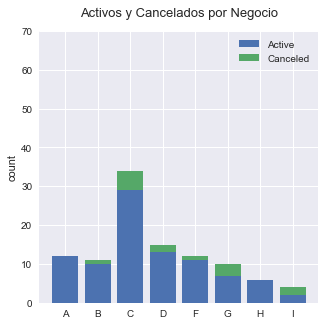

In [40]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(df_grouped.index, df_grouped21['Active'], label='Active')
plt2 = ax.bar(df_grouped.index, df_grouped21['Canceled'], bottom=df_grouped21['Active'])

ax.set_ylabel('count')
ax.set_title('Activos y Cancelados por Negocio', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Active', 'Canceled'));
ax.set_ylim(0, 70);

In [41]:
#Ahora viene análisis de actuales

In [50]:
adf = pd.read_csv('/Users/jorgecajiga/Documents/Proyecto Final BEDU/DA_Actual.csv')
adf.head()

,Negocio,Origen,Plataforma2,Fiscal Year,Posting period,Renovation / Innovat,GPS,NPS,PTA,NPTA,BG,NNS,TSRE,Cogs1,Cogs2,Cogs3,CMC,PFME
0,C,S,NE,2021,1,I,0.364846,0.339688,0.024310,-1.591550e-07,0.0,0.305504,0.0,0.183417,0.0,0.0,0.098936,0.00179
1,C,S,NE,2021,1,I,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
2,C,S,NE,2021,1,I,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
3,C,S,NE,2021,1,I,0.000000,0.000000,0.002836,0.000000e+00,0.0,-0.002836,0.0,0.000000,0.0,0.0,-0.002836,0.00000
4,A,P,NE,2021,1,I,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0,-0.000138,0.00000


In [51]:
print(adf.columns)

Index(['Negocio', 'Origen', 'Plataforma2', 'Fiscal Year', 'Posting period',
       'Renovation / Innovat', 'GPS', 'NPS', 'PTA', 'NPTA', 'BG', 'NNS',
       'TSRE', 'Cogs1', 'Cogs2', 'Cogs3', 'CMC', 'PFME'],
      dtype='object')


In [54]:
adf1 = adf.drop(columns=['Renovation / Innovat','Fiscal Year'])
adf1

,Negocio,Origen,Plataforma2,Posting period,GPS,NPS,PTA,NPTA,BG,NNS,TSRE,Cogs1,Cogs2,Cogs3,CMC,PFME
0,C,S,NE,1,0.364846,0.339688,0.024310,-1.591550e-07,0.0,0.305504,0.0,0.183417,0.0,0.000000,0.098936,0.001790
1,C,S,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,C,S,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,C,S,NE,1,0.000000,0.000000,0.002836,0.000000e+00,0.0,-0.002836,0.0,0.000000,0.0,0.000000,-0.002836,0.000000
4,A,P,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.000138,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,D,P,NE,7,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000052
2965,D,P,NE,7,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2966,D,P,NE,7,0.450189,0.449275,0.000000,0.000000e+00,0.0,0.352930,0.0,0.000186,0.0,0.086484,0.259317,0.000499
2967,D,P,NE,7,0.327651,0.324516,0.000000,0.000000e+00,0.0,0.293593,0.0,0.000127,0.0,0.064000,0.225511,0.001953


In [53]:
ncna = {
    'Negocio':'a_negocio',
    'Origen':'a_origen',
    'Plataforma2':'a_tipo_i',
    'Posting period':'a_mes',
    'GPS':'a_gps',
    'NPS':'a_nps',
    'PTA':'a_pta',
    'NPTA':'a_npta',
    'BG':'a_bg',
    'NNS':'a_nns',
    'TSRE':'a_tsre',
    'Cogs1':'a_cgs1',
    'Cogs2':'a_cgs2',
    'Cogs3':'a_cgs3',
    'CMC':'a_cmc',
    'PFME':'a_me'
}

In [74]:
adf2 = adf1.rename(columns=ncna)
adf2.head()

,a_negocio,a_origen,a_tipo_i,a_mes,a_gps,a_nps,a_pta,a_npta,a_bg,a_nns,a_tsre,a_cgs1,a_cgs2,a_cgs3,a_cmc,a_me
0,C,S,NE,1,0.364846,0.339688,0.024310,-1.591550e-07,0.0,0.305504,0.0,0.183417,0.0,0.0,0.098936,0.00179
1,C,S,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
2,C,S,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
3,C,S,NE,1,0.000000,0.000000,0.002836,0.000000e+00,0.0,-0.002836,0.0,0.000000,0.0,0.0,-0.002836,0.00000
4,A,P,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0,-0.000138,0.00000


In [77]:
adf2['a_ts']=adf2['a_pta']+adf2['a_npta']+adf2['a_tsre']
adf2['a_cgs']=adf2['a_cgs1']+adf2['a_cgs2']+adf2['a_cgs3']
adf2

,a_negocio,a_origen,a_tipo_i,a_mes,a_gps,a_nps,a_pta,a_npta,a_bg,a_nns,a_tsre,a_cgs1,a_cgs2,a_cgs3,a_cmc,a_me,a_ts,a_cgs
0,C,S,NE,1,0.364846,0.339688,0.024310,-1.591550e-07,0.0,0.305504,0.0,0.183417,0.0,0.000000,0.098936,0.001790,0.024310,0.183417
1,C,S,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,C,S,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,C,S,NE,1,0.000000,0.000000,0.002836,0.000000e+00,0.0,-0.002836,0.0,0.000000,0.0,0.000000,-0.002836,0.000000,0.002836,0.000000
4,A,P,NE,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.000138,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,D,P,NE,7,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000052,0.000000,0.000000
2965,D,P,NE,7,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2966,D,P,NE,7,0.450189,0.449275,0.000000,0.000000e+00,0.0,0.352930,0.0,0.000186,0.0,0.086484,0.259317,0.000499,0.000000,0.086670
2967,D,P,NE,7,0.327651,0.324516,0.000000,0.000000e+00,0.0,0.293593,0.0,0.000127,0.0,0.064000,0.225511,0.001953,0.000000,0.064126


In [87]:
adf3 = adf2.drop(columns=['a_pta','a_npta','a_tsre','a_cgs1','a_cgs2','a_cgs3'])
adf3

,a_negocio,a_origen,a_tipo_i,a_mes,a_gps,a_nps,a_bg,a_nns,a_cmc,a_me,a_ts,a_cgs
0,C,S,NE,1,0.364846,0.339688,0.0,0.305504,0.098936,0.001790,0.024310,0.183417
1,C,S,NE,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,C,S,NE,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,C,S,NE,1,0.000000,0.000000,0.0,-0.002836,-0.002836,0.000000,0.002836,0.000000
4,A,P,NE,1,0.000000,0.000000,0.0,0.000000,-0.000138,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2964,D,P,NE,7,0.000000,0.000000,0.0,0.000000,0.000000,0.000052,0.000000,0.000000
2965,D,P,NE,7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2966,D,P,NE,7,0.450189,0.449275,0.0,0.352930,0.259317,0.000499,0.000000,0.086670
2967,D,P,NE,7,0.327651,0.324516,0.0,0.293593,0.225511,0.001953,0.000000,0.064126


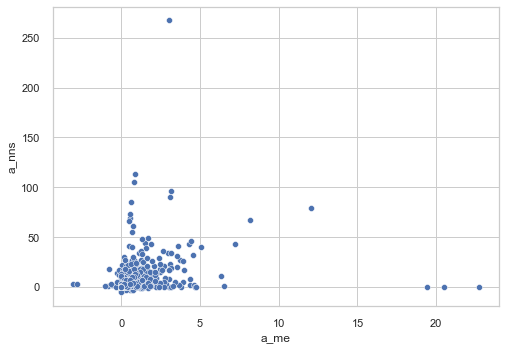

In [99]:
sns.scatterplot(x=adf3['a_me'],y=adf3['a_nns']);

In [101]:
#Coeficiente de correlación
adf3['a_me'].corr(adf3['a_nns'])

0.3283526960587669

In [91]:
adf3['a_negocio'].unique()

array(['C', 'A', 'B', 'D', 'F', 'G', 'H', 'I'], dtype=object)

In [93]:
A =adf3[adf3['a_negocio'] == 'A']
B =adf3[adf3['a_negocio'] == 'B']
C =adf3[adf3['a_negocio'] == 'C']
D =adf3[adf3['a_negocio'] == 'D']
F =adf3[adf3['a_negocio'] == 'F']
G =adf3[adf3['a_negocio'] == 'G']
H =adf3[adf3['a_negocio'] == 'H']
I =adf3[adf3['a_negocio'] == 'I']

IndexError: list index out of range

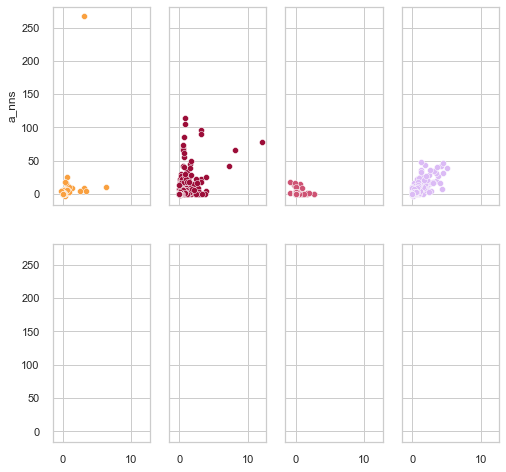

In [122]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 4, sharex=True, sharey=True)

sns.scatterplot(x=A['a_me'],y=A['a_nns'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x=B['a_me'],y=B['a_nns'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x=C['a_me'],y=C['a_nns'], ax=axes[0, 2], color=palette[2])
sns.scatterplot(x=D['a_me'],y=D['a_nns'], ax=axes[0, 3], color=palette[3])
sns.scatterplot(x=F['a_me'],y=F['a_nns'], ax=axes[1, 0], color=palette[5])
sns.scatterplot(x=G['a_me'],y=G['a_nns'], ax=axes[1, 1], color=palette[6])
sns.scatterplot(x=H['a_me'],y=H['a_nns'], ax=axes[1, 2], color=palette[7])
sns.scatterplot(x=I['a_me'],y=I['a_nns'], ax=axes[1, 3], color=palette[8]);

axes[0, 0].set_title('A')
axes[0, 1].set_title('B')
axes[0, 2].set_title('C')
axes[0, 3].set_title('D')
axes[0, 4].set_title('F')
axes[0, 5].set_title('G')
axes[0, 6].set_title('H')
axes[0, 7].set_title('I')

fig.suptitle('Relación ME y NNS por Negocio', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

In [103]:
adf_grouped = adf2.groupby(['a_negocio',])[['a_gps', 'a_nps', 'a_pta', 'a_npta', 'a_bg', 'a_nns', 'a_tsre', 'a_cgs1', 'a_cgs2', 'a_cgs3', 'a_cmc', 'a_me']].sum()
adf_grouped

,a_gps,a_nps,a_pta,a_npta,a_bg,a_nns,a_tsre,a_cgs1,a_cgs2,a_cgs3,a_cmc,a_me
a_negocio,,,,,,,,,,,,
A,668.126406,627.904983,36.053525,12.049392,2.305197,564.132859,1.268848,337.915140,0.000000,0.000404,202.367253,35.932055
B,3039.079897,2796.018885,113.402237,46.625651,2.218318,2588.365314,3.894419,703.187873,-0.080465,117.645004,1716.118999,186.110750
C,281.582472,267.270531,54.722203,-28.120350,0.569966,239.157029,1.486773,79.291118,0.000000,2.563548,134.482400,19.875184
D,2155.426078,2109.053493,97.538362,47.535568,10.600860,1897.970420,10.381323,620.912529,-1.006458,229.052105,986.500503,185.535989
F,146.808283,141.710823,30.183896,-0.397716,0.709295,107.848564,2.281631,3.650771,0.000000,43.353477,54.099609,117.870600
G,283.662059,259.862821,33.362155,0.411729,8.477994,210.108517,10.442522,82.790788,16.133704,20.890954,70.043346,20.272876
H,252.628717,222.473728,17.125629,4.127652,0.092920,194.988850,0.118773,4.076493,0.000000,90.485952,96.405141,89.720347
I,79.304172,76.132492,10.440996,0.191009,0.186948,63.624527,0.058279,0.704427,59.827210,0.000000,3.034612,-0.234682


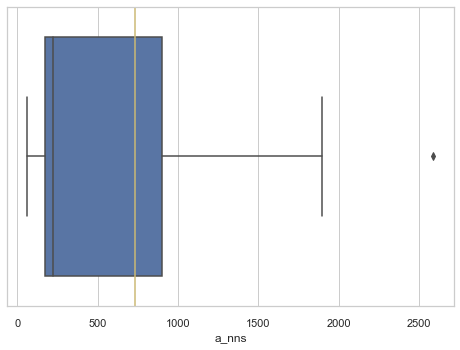

In [130]:
sns.set(style="whitegrid")
sns.boxplot(x=adf_grouped['a_nns'])
plt.axvline(adf_grouped['a_nns'].mean(), c='y'); # (valor de la línea, color)

In [96]:
adf_grouped['a_nns'].max()

2588.365314340545

Conclusiones: 
- La relación de proyectos cancelados sobre activos es mayor en el transcurso de 3 años.
- Solo en 3 de 8 negocios no ocurre esta situación. Conviene analizar a mayor detalle si lo acompaña una buena ejecución
- En 2021 la relación sucede al contrario. Los activos superan a los cancelados. ¿Será que es en años posteriores cuando van cayendo en estatus Cancelado?
- Watchout con los negocios I, C y G. Son los que más llevan cancelados al momento.
- Con el presente análisis no parece haber una relación entre la inversión comercial y el crecimiento en ventas. Convendrá retomar el análisis a final de año sobre proyectos que lleven al menos 8 meses de lanzamiento.